In [1]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from nltk.stem.snowball import SnowballStemmer
from sklearn.manifold import TSNE

cancer_titles = pd.read_csv('csv-cancer-set.csv')[:1000]['Title']
virus_titles = pd.read_csv('csv-virus-set.csv')[:1000]['Title']

titles = list(cancer_titles) + list(virus_titles)
subtype = 1000*['cancer'] + 1000*['virus']
df = pd.DataFrame({'title': titles, 'subtype': subtype})
df

,title,subtype
0,[Lucy's cancer(s): A prehistorical origin?],cancer
1,Cancer prevention: from 1727 to milestones of ...,cancer
2,Tumor microenvironment: recent advances in var...,cancer
3,"Clinical, Prognostic and Therapeutic Significa...",cancer
4,Cancer-associated fibroblasts in tumor microen...,cancer
...,...,...
1995,The pathogenicity of Rous sarcoma virus for ma...,virus
1996,A novel nyavirus lacking matrix and glycoprote...,virus
1997,Prevalence and natural host range of Homalodis...,virus
1998,Enhanced bioinformatic profiling of VIDISCA li...,virus


In [2]:
# функция для удаления всех не буквенно-числовых символов
def clean(word):
    return ''.join(ch for ch in word if ch.isalnum())

# разделение текста на токены
def custom_tokenizer(text):
    text = text.lower().split(' ') # делим текст по пробелам и делаем все буквы строчными
    # удаляем слова из списка стоп-слов
    text_tokenized = [w for w in text if w not in nltk.corpus.stopwords.words('english')]
    # удаляем все не буквенно-числовые символы
    text_clean = [clean(word) for word in text_tokenized]
    # производим стемминг (оставляем основу слова)
    stemmer = SnowballStemmer('english')
    text_stemmed = [stemmer.stem(w) for w in text_clean]
    return set(text_stemmed)

# подсчет расстояния между двумя текстами
def dist(title1, title2):
    return 1 - len(title1.intersection(title2))/len(title1.union(title2))

In [8]:
matrix = []
words_from_titles = [custom_tokenizer(elem) for elem in titles]

for title1, title2 in itertools.product(words_from_titles, repeat=2):
    matrix.append(dist(title1, title2))
    
matrix = np.array(matrix).reshape(2000,2000)
matrix

array([[0.        , 0.9       , 0.9       , ..., 1.        , 1.        ,
        1.        ],
       [0.9       , 0.        , 0.92307692, ..., 1.        , 1.        ,
        1.        ],
       [0.9       , 0.92307692, 0.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 0.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.        ]])

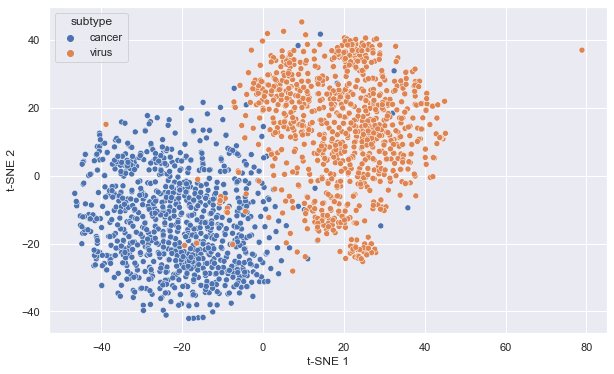

In [10]:
model = TSNE(n_components=2, perplexity=50, metric='precomputed')
X = model.fit_transform(matrix)

df['t-SNE 1'] = X[:, 0]
df['t-SNE 2'] = X[:, 1]

sns.set(rc={'figure.figsize':(10, 6)})
sns.scatterplot(x='t-SNE 1', y='t-SNE 2', data = df, hue='subtype');